In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
np.random.seed(0)
plt.style.use("ggplot")

import tensorflow as tf
print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.7.0
GPU detected: []


In [2]:
sent='''Lionel Messi has won the award a record seven times, followed by Cristiano Ronaldo with five. Three players have won the award three times each: Johan Cruyff, Michel Platini, and Marco van Basten. With seven awards each, Dutch, German, Argentine and Portuguese players have won the most Ballons d'Or. Players from Germany (1972, 1981) and the Netherlands (1988) were the only to take all three top spots in one year, with German (1972) and especially Italian clubs (1988–1990) achieving the same feat, including two years solely made up of AC Milan players (1988, 1989), a unique record until Spanish clubs experienced an unforeseen dominance (2009–2012, 2015, 2016) and Barcelona (2010) became the second club with three top players. Two Spanish clubs, Barcelona and Real Madrid, also lead the ranking for employing the most winners, with twelve and eleven wins.'''

In [3]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
def remove_punct(sent):
    new_sent= "".join([i for i in sent if i not in string.punctuation])
    return new_sent

In [5]:
sent=remove_punct(sent)

In [6]:
def lower(sent):
    new_sent="".join([i.lower() for i in sent])
    return new_sent

In [7]:
sent=lower(sent)

In [8]:
from nltk.tokenize import word_tokenize
text = sent
tokens=word_tokenize(text)

In [9]:
stopwords = nltk.corpus.stopwords.words('english')

In [10]:
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [11]:
vocabulary=remove_stopwords(tokens)

In [12]:
len(vocabulary)

93

In [13]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [14]:
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

In [15]:
words=stemming(vocabulary)

In [16]:
y=[1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0]

In [17]:
data={}
j=0
for i in words:
    data[i]=y[j]
    j=j+1

In [18]:
len(data)

70

In [19]:
print(data)

{'lionel': 1, 'messi': 1, 'award': 0, 'record': 0, 'seven': 0, 'time': 0, 'follow': 0, 'cristiano': 1, 'ronaldo': 1, 'five': 0, 'three': 0, 'player': 0, 'johan': 1, 'cruyff': 1, 'michel': 1, 'platini': 1, 'marco': 1, 'van': 1, 'basten': 1, 'dutch': 0, 'german': 0, 'argentin': 0, 'portugues': 0, 'ballon': 1, 'dor': 1, 'germani': 1, '1972': 0, '1981': 0, 'netherland': 1, '1988': 0, 'take': 0, 'top': 0, 'spot': 0, 'one': 0, 'year': 0, 'especi': 0, 'italian': 0, 'club': 0, '1988–1990': 0, 'achiev': 0, 'feat': 0, 'includ': 0, 'two': 0, 'sole': 0, 'made': 0, 'ac': 1, 'milan': 1, '1989': 0, 'uniqu': 0, 'spanish': 0, 'experienc': 0, 'unforeseen': 0, 'domin': 0, '2009–2012': 0, '2015': 0, '2016': 0, 'barcelona': 1, '2010': 0, 'becam': 0, 'second': 0, 'real': 1, 'madrid': 1, 'also': 0, 'lead': 0, 'rank': 0, 'employ': 0, 'winner': 0, 'twelv': 0, 'eleven': 0, 'win': 0}


In [20]:
words=list(set(words))

In [21]:
output=[]
for i in range(len(words)):
    output.append(data[words[i]])

In [22]:
def wordmapping(output,words):
    sentences=[]
    for w,t in zip(words, output):
        sentences.append((w,t))
    return sentences

In [23]:
sent_tag=wordmapping(output,words)

In [24]:
sent_tag

[('win', 0),
 ('follow', 0),
 ('player', 0),
 ('two', 0),
 ('italian', 0),
 ('lionel', 1),
 ('1989', 0),
 ('2016', 0),
 ('seven', 0),
 ('cruyff', 1),
 ('spot', 0),
 ('feat', 0),
 ('1988–1990', 0),
 ('includ', 0),
 ('domin', 0),
 ('twelv', 0),
 ('argentin', 0),
 ('record', 0),
 ('dor', 1),
 ('1972', 0),
 ('experienc', 0),
 ('rank', 0),
 ('becam', 0),
 ('german', 0),
 ('1981', 0),
 ('winner', 0),
 ('eleven', 0),
 ('lead', 0),
 ('second', 0),
 ('michel', 1),
 ('van', 1),
 ('employ', 0),
 ('dutch', 0),
 ('germani', 1),
 ('especi', 0),
 ('sole', 0),
 ('netherland', 1),
 ('1988', 0),
 ('ac', 1),
 ('milan', 1),
 ('three', 0),
 ('johan', 1),
 ('barcelona', 1),
 ('made', 0),
 ('uniqu', 0),
 ('2015', 0),
 ('club', 0),
 ('take', 0),
 ('also', 0),
 ('messi', 1),
 ('spanish', 0),
 ('real', 1),
 ('award', 0),
 ('one', 0),
 ('year', 0),
 ('2009–2012', 0),
 ('2010', 0),
 ('time', 0),
 ('unforeseen', 0),
 ('five', 0),
 ('top', 0),
 ('cristiano', 1),
 ('portugues', 0),
 ('platini', 1),
 ('achiev', 0),
 

In [25]:
def get_dict(data):

    words =list(set(data))
    n = len(words)
    idx = 0
    # return these correctly
    word2Ind = {}
    Ind2word = {}
    for k in words:
        word2Ind[k] = idx
        Ind2word[idx] = k
        idx += 1
    return word2Ind, Ind2word

In [26]:
word2Ind, Ind2word = get_dict(words)

In [27]:
def word_to_one_hot_vector(words, word2Ind, V):
    embeddings=[]
    for word in words:
        one_hot_vector = np.zeros(V)
        one_hot_vector[word2Ind[word]] = 1
        embeddings.append(list(one_hot_vector))
    return embeddings

In [28]:
V=70

In [29]:
embeddings=word_to_one_hot_vector(words, word2Ind, V)

In [30]:
embeddings

[[1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  1.

In [31]:
embedd = pd.DataFrame(embeddings, columns = [i for i in range(70)])

In [32]:
out=[]
for i in range(len(words)):
    out.append(data[words[i]])
embedd['output']=out

In [33]:
embedd

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,output
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [34]:
X=embedd.iloc[:,:-1].values

In [35]:
X.shape

(70, 70)

In [36]:
X=X.T

In [37]:
y=embedd.iloc[:,-1].values

In [38]:
y=y.reshape(70,1)

In [39]:
y.shape

(70, 1)

In [40]:
X=X.reshape(70,1,70)

In [41]:
X

array([[[1., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.]],

       [[0., 0., 1., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 1., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]]])

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=70,batch_input_shape=(10,70,70),activation='tanh', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=1, activation='tanh', return_sequences=False)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [43]:
model.build(X.shape)

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (70, 1, 140)             78960     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (70, 2)                  1136      
 nal)                                                            
                                                                 
 dense (Dense)               (70, 1)                   3         
                                                                 
Total params: 80,099
Trainable params: 80,099
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
history=model.fit(X,y,epochs=50,batch_size=10)

Epoch 1/50
7/7 [==============================] - 4s 4ms/step - loss: 0.6919 - accuracy: 0.6714
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.7143
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.7143
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6826 - accuracy: 0.7143
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6791 - accuracy: 0.7143
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.7143
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6700 - accuracy: 0.7143
Epoch 8/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6646 - accuracy: 0.7143
Epoch 9/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.7143
Epoch 10/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6485 - accuracy: 0.7143
Epoch 11/50
7/7 [======================

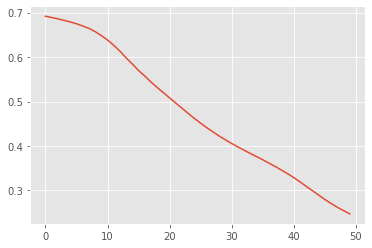

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()

In [48]:
X[1].shape

(1, 70)

## --------------------------------------------------------------------------------------------------------------------

In [49]:
#Input Shape (shape of training data) = (nx,m, t)
#n= no. of features
#m=batch size
#t=no of time steps

In [50]:
#inputs shape -> batch_size, no. of features, no. of time steps